In [1]:
from pyslise import Pyslise
f = lambda x: (x^2+1)*5
ps = Pyslise(f, -3, 3, 32)

In [2]:
es = ps.computeEigenvaluesByIndex(0,10, (0,1), (0, 1))
es

[(0, 7.23606801761083),
 (1, 11.70820545931589),
 (2, 16.18036732008387),
 (3, 20.65278409502715),
 (4, 25.12702891862889),
 (5, 29.61071234338609),
 (6, 34.13016029410866),
 (7, 38.749906739007855),
 (8, 43.58076238742022),
 (9, 48.7556818270939)]

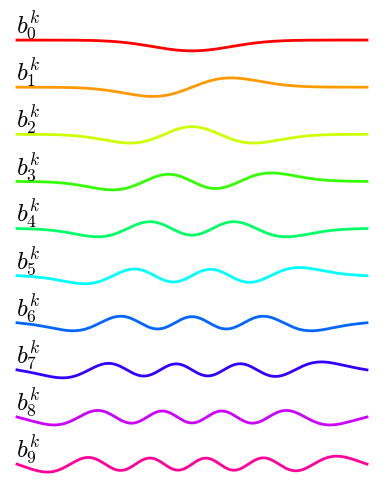

In [13]:
d = 4

efs = [
    (i, (lambda i, ef:
         (lambda n:
              lambda x: -d*i-ef(x)[0]/n
         )(sqrt(numerical_integral(lambda x: ef(x)[0]**2, -3, 3)[0]))
    )(i, ps.eigenfunctionCalculator(e, (0,1), (0,1))))
        for i, e in es]
p = sum(plot(ef, -3, 3, color=hue(1.*i/len(efs)), thickness=2)
    for i, ef in efs)
p += sum(text("$b^{k}_{%d}$"%i, (-2.8,-d*i+1.2), color="black", fontsize=18) for i, f in efs)

disp_args = {
    'figsize': [4,5],
    'axes': False
}
p.show(**disp_args)

In [14]:
p.save('matslise.pdf', **disp_args)